In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from nltk.corpus import gutenberg
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF

In [5]:
df = sklearn.datasets.fetch_20newsgroups().data

In [6]:
type(df)

list

In [7]:
len(df)

11314

In [8]:
df[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [9]:
# Creating the tf-idf matrix and limiting the maximum features to remove junk words
vectorizer = TfidfVectorizer(stop_words='english',max_features  = 10000)

df_tfidf=vectorizer.fit_transform(df)

In [10]:
# Getting the word list.
terms = vectorizer.get_feature_names()

In [11]:
[vectorizer.idf_,vectorizer.vocabulary]

[array([4.17690557, 4.31043697, 8.9475902 , ..., 8.03129947, 6.36359264,
        7.56129584]), None]

In [12]:
vectorizer.get_feature_names()

['00',
 '000',
 '005',
 '01',
 '02',
 '02238',
 '02p',
 '03',
 '030',
 '0358',
 '04',
 '040',
 '0400',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0b',
 '0c',
 '0d',
 '0el',
 '0em',
 '0g',
 '0i',
 '0l',
 '0m',
 '0p',
 '0q',
 '0qax',
 '0t',
 '0tbxn',
 '0tq',
 '0u',
 '0w',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '102nd',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10k',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '117',
 '118',
 '119',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '1280x1024',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '13p',
 '13q',
 '13s',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '1500',
 '151',
 '152',
 '153',
 '1542',
 '155',
 '156',
 '157',
 '158',
 '159',
 '15o',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '16550',
 '167',
 '16m',
 '16mb',
 '17',
 

In [13]:
# Number of topics.
ntopics=3

In [14]:
# Linking words to topics
def word_topic(tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

In [15]:
type(df_tfidf)

scipy.sparse.csr.csr_matrix

In [16]:
print(df_tfidf)

  (0, 9632)	0.3442616790861601
  (0, 9270)	0.28084529738517694
  (0, 3278)	0.07239488898759387
  (0, 8937)	0.08237166633774526
  (0, 8613)	0.025393510771826777
  (0, 1865)	0.505490229176203
  (0, 6247)	0.04728544000792017
  (0, 6957)	0.045694124753100564
  (0, 4489)	0.046952803755850474
  (0, 6499)	0.026417036536227016
  (0, 9315)	0.049159943884206414
  (0, 5692)	0.14496931188656484
  (0, 2224)	0.10341235230659479
  (0, 6628)	0.1314070825270508
  (0, 5417)	0.02547668350130223
  (0, 100)	0.08394290006857165
  (0, 9798)	0.1177444040224258
  (0, 3399)	0.17779723771704115
  (0, 7912)	0.11218046803497926
  (0, 2755)	0.08777491696749302
  (0, 3121)	0.1327557274482504
  (0, 8427)	0.14328381585833247
  (0, 5498)	0.11978407146862355
  (0, 5260)	0.12220433154614944
  (0, 3233)	0.11204394345466276
  :	:
  (11313, 5115)	0.14672153734140475
  (11313, 9182)	0.11775102892744031
  (11313, 1814)	0.22298468068081748
  (11313, 4463)	0.15507257384749956
  (11313, 4783)	0.10627526117554502
  (11313, 8088)	

In [17]:
# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

In [18]:
# Number of words to look at for each topic.
n_top_words = 50

In [19]:
# LSA (Latent Semantic Analysis)

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
df_lsa = lsa.fit_transform(df_tfidf)

components_lsa = word_topic(df_tfidf, df_lsa, terms)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words) 

In [20]:
components_lsa

,0,1,2
00,40.891627,-11.702223,-0.377372
000,31.100939,3.010168,-2.458627
005,0.383905,-0.096439,0.047342
01,12.393116,0.622013,-0.587783
02,13.744638,0.050484,0.056887
02238,1.165323,0.746640,-0.266666
02p,0.484070,-0.308057,-0.200442
03,12.129474,0.903935,1.529071
030,2.195832,-0.756551,-0.236055
0358,2.907495,0.332926,1.513963


In [21]:
# LDA (Latent Dirchelet Allocation)

lda = LDA(n_topics=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

df_lda = lda.fit_transform(df_tfidf) 

components_lda = word_topic(df_tfidf, df_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [22]:
# NNMF (Non-Negative Matrix Factorization)

nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
df_nmf = nmf.fit_transform(df_tfidf) 

components_nmf = word_topic(df_tfidf, df_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

In [23]:
# For each topic, we list the ten most-relevant words according to each method:

for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])

Topic 0:
                   LSA                  LDA               NNMF
0           edu 389.58           edu 264.53           com 9.78
0           com 283.94           com 186.92           edu 6.15
0        subject 175.2        writes 118.33        windows 5.0
0          lines 173.8       article 115.29         lines 4.26
0  organization 172.07        subject 111.0       subject 4.24
0        writes 163.32  organization 109.32  organization 4.16
0       article 161.49         lines 108.78           use 3.61
0    university 150.83            don 97.67       posting 3.43
0        posting 138.0         people 94.81            ca 3.35
0          like 134.27     university 94.02          like 3.33
0           don 133.53           just 92.84          host 3.31
0          host 132.19           like 90.72          nntp 3.26
0          nntp 130.94            god 90.33         drive 3.19
0          just 130.86             ca 87.48       article 3.19
0            ca 128.43        posting 85.69   

# Sparsity

Now let's examine sparsity by looking at the distributions of loadings for different words across the methods:

## Religious keywords

In [24]:
# The words to look at.
targetwords=['religious','christianity','israel']

In [25]:
# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

In [26]:
# For each word, extracting and string the loadings for each method.
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

In [27]:
# Labeling the data by method and providing an ordering variable for graphing purposes. 
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], ntopics, axis=0)
wordloadings['loading']=list(range(ntopics))*3

In [28]:
wordloadings.shape

(9, 5)

In [29]:
wordloadings.head()

,religious,christianity,israel,method,loading
0,16.218272,16.449988,36.030759,LSA,0
1,10.663341,13.119149,19.484853,LSA,1
2,-0.871396,0.673330,3.695950,LSA,2
0,14.259006,18.770329,13.013422,LDA,0
1,1.012177,0.951141,2.288460,LDA,1


In [30]:
sns.set(style="darkgrid")

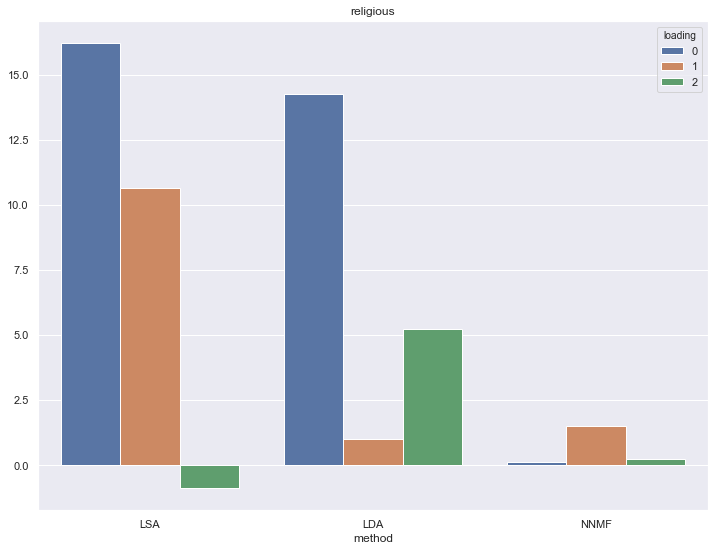

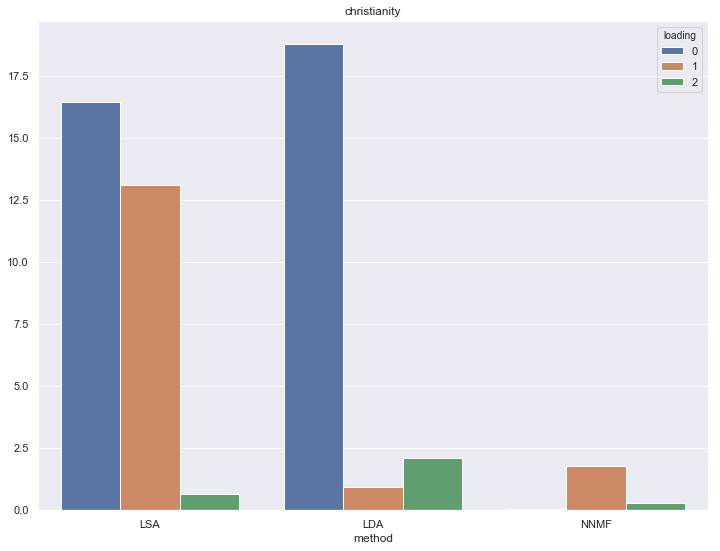

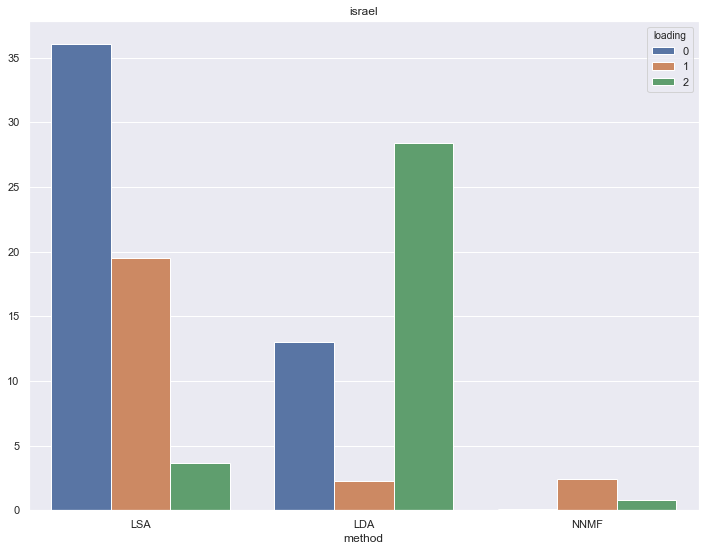

In [31]:
for word in targetwords:
    plt.subplots(figsize=(12,9))
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

Let's use different targetwords associated with the other two topics and see what happens.

## University keywords

In [32]:
targetwords=['upenn','berkeley','georgia']

In [33]:
# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

In [34]:
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

In [35]:
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], ntopics, axis=0)
wordloadings['loading']=list(range(ntopics))*3

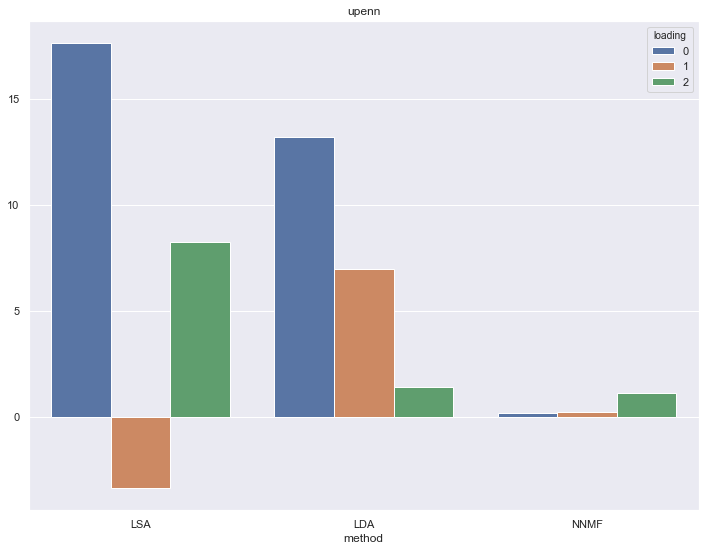

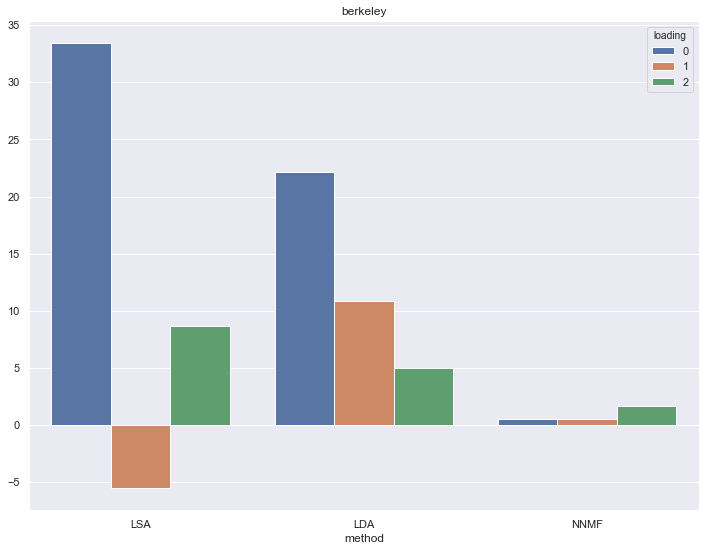

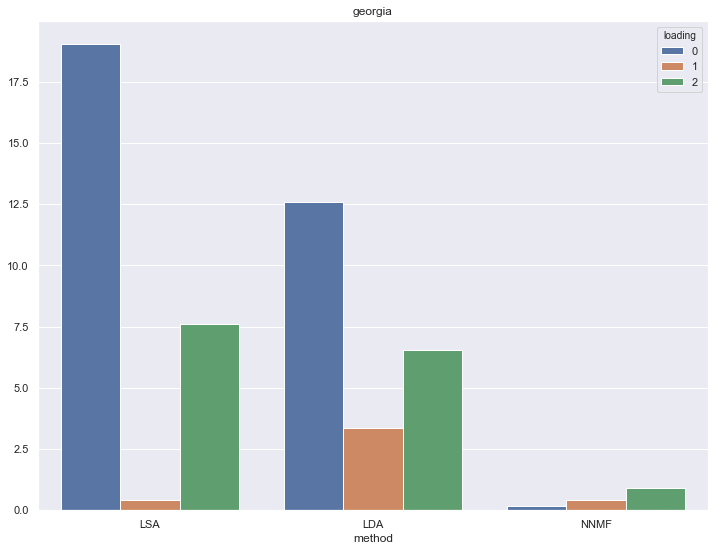

In [36]:
for word in targetwords:
    plt.subplots(figsize=(12,9))
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

## Tech keywords

In [37]:
targetwords=['windows','software','computer']

In [38]:
# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

In [39]:
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

In [40]:
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], ntopics, axis=0)
wordloadings['loading']=list(range(ntopics))*3

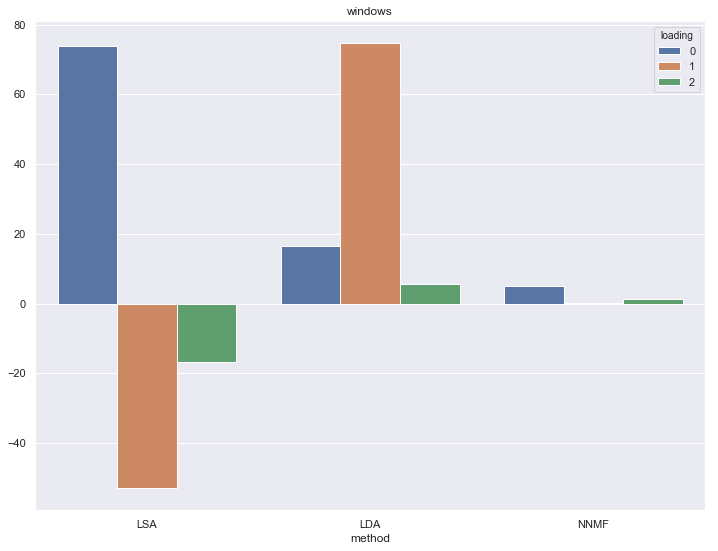

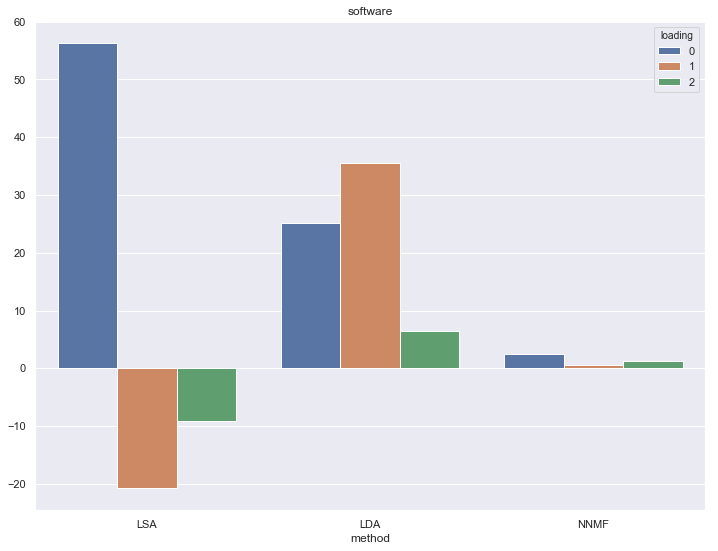

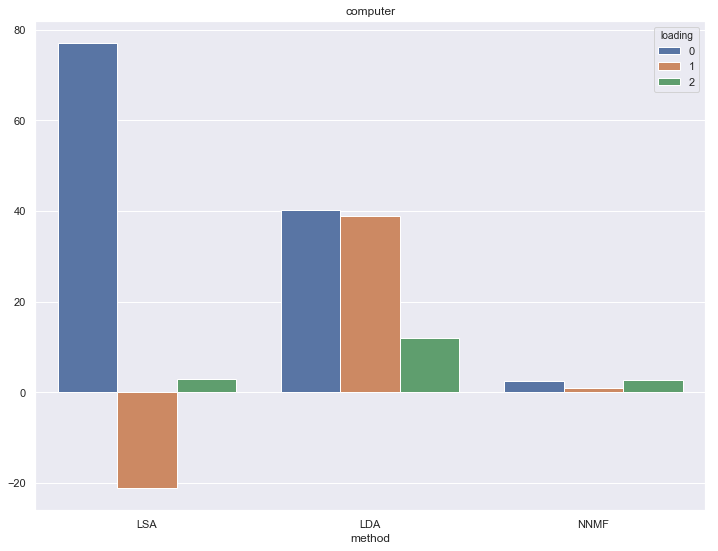

In [41]:
for word in targetwords:
    plt.subplots(figsize=(12,9))
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

## Conclusion

LSA Topic 0 seems to be the best fit for all our groups of targetwords, compared to the other two. The 0th top words list is very diverse, containing keywords for all three topics with words like "god", "university" and "computer". So it stands to reason that all of the topics I input would find strong associates with that list. But note the difference in the loadings for them. 

With LDA, which takes longer to fit, the loadings present a more clear difference in which top-word listing is the best fit for the input topics. I initially assumed that the dataset being 20 Newsgroups meant that there would be 20 topics. A fair assumption, but the LDA took 18 hours to fit on it. By increasing the number of top-words and reducing the number of topics I can see them clustering in a much easier to identify pattern. 

I think the NNMF should probably be graphed separate from the LSA and LDA since the loadings are so much smaller. But we can still see that the loadings for the religious words fit the 1st list, educational fit the 2nd, and tech words fit the 0th list very well. 

It is clear that there are benefits to fitting several models for comparison. Sometimes they reach very similar conclusions despite their different methods. And the differences they do show can help give perspective to the Data Scientist before drawing conclusions. 